## Problem Statement: House Price Prediction

### To find out the various factors that influences a home buyer to buy their dream house or the main factors that contribute to the SalePrice of a house.

In [1]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from datetime import date
from sklearn.model_selection import train_test_split

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Load the data

In [2]:
# loading the dataset
houseData = pd.read_csv("/kaggle/input/regression-technique-eda/House Price Regression Tecnique/train.csv")
houseTest = pd.read_csv("/kaggle/input/regression-technique-eda/House Price Regression Tecnique/test.csv")

In [3]:
#Checking train dataset info
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#Checking test dataset info
houseTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### 2. Data Exploration and Cleaning

In [5]:
houseData.head()
#function to find the missing column in test dataset, so as to make predictions.
def column_difference(test,train):
    test_col= test.columns
    train_col = train.columns
    print(train_col.difference(test_col))
column_difference(houseTest,houseData)

Index(['SalePrice'], dtype='object')


In [6]:
##### Verify and remove any columns which has unique values in it
def removeUniqueValueColumn(data):
    data.shape
    data=data.loc[:,data.nunique()!=1]
    return data
houseData = removeUniqueValueColumn(houseData)

#Function to write predicted SalePrice values for test data
def write_prediction(prediction, name):
    Id = np.array(houseTest["Id"]).astype(int)
    solution = pd.DataFrame(prediction, Id, columns = ["SalePrice"])
    solution.to_csv(name, index_label = ["Id"])


#### 

In [7]:
#Remove any rows with duplicate data
len(houseData) - len(houseData.drop_duplicates())
column_difference(houseTest,houseData)

Index(['SalePrice'], dtype='object')


In [8]:
# List of columns with null values
def missingDataPercentage(df):
    missingData = df[df.columns[df.isnull().any()]].isna().sum()
    print(missingData/len(df)*100)
    
missingDataPercentage(houseData)
missingDataPercentage(houseTest)  

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64
MSZoning         0.274160
LotFrontage     15.558602
Alley           92.666210
Utilities        0.137080
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType      61.274846
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.1370

In [9]:
column_difference(houseTest,houseData)

Index(['SalePrice'], dtype='object')


In [10]:
#Removing columns with the most number of null or missing values 
#Columns Alley,FireplaceQu,PoolQC,Fence,MiscFeature,LotFrontage
def dropColumnsWithMostNulls(data):
    data = data.drop(['Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature','LotFrontage','Utilities'], axis = 1)
    return data
houseData=dropColumnsWithMostNulls(houseData)
missingDataPercentage(houseData)


MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64


In [11]:
#Similarly for test dataset, dropping columns with most missing values.
houseTest=dropColumnsWithMostNulls(houseTest)
missingDataPercentage(houseTest)

MSZoning         0.274160
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType      61.274846
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
KitchenQual      0.068540
Functional       0.137080
GarageType       5.209047
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageCars       0.068540
GarageArea       0.068540
GarageQual       5.346127
GarageCond       5.346127
SaleType         0.068540
dtype: float64


In [12]:
def column_dataQuality(data,column):
    print(data[column].unique(),'\n')
    print('Null value percentage: ',data[column].isna().sum()*100/len(data[column]),'\n')
    print(data[column].describe())

In [13]:
houseData.shape

(1460, 74)

In [14]:
houseTest.shape

(1459, 73)

In [15]:
column_difference(houseTest,houseData)

Index(['SalePrice'], dtype='object')


In [16]:
#Imputing missing values for the categorical feature data 
for column in houseData[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType','Electrical']]:
    houseData[column].fillna(houseData[column].mode()[0], inplace=True)


In [17]:
#Again checking for missing data percentage after imputing missing values.
missingDataPercentage(houseData)

MasVnrArea     0.547945
GarageYrBlt    5.547945
dtype: float64


In [18]:
#Similarly checking for missing values and imputations in test dataset.
for column in houseTest[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType','Electrical']]:
    houseTest[column].fillna(houseTest[column].mode()[0], inplace=True)
missingDataPercentage(houseTest)

MSZoning        0.274160
Exterior1st     0.068540
Exterior2nd     0.068540
MasVnrArea      1.028101
BsmtFinSF1      0.068540
BsmtFinSF2      0.068540
BsmtUnfSF       0.068540
TotalBsmtSF     0.068540
BsmtFullBath    0.137080
BsmtHalfBath    0.137080
KitchenQual     0.068540
Functional      0.137080
GarageYrBlt     5.346127
GarageCars      0.068540
GarageArea      0.068540
SaleType        0.068540
dtype: float64


In [19]:
#Imputing missing values in numerical columns with median 
def imputeNumericData(data):
    columns = data.select_dtypes(include=np.number).columns.tolist()
    for column in columns:
        data[column].fillna(data[column].median(), inplace=True)
    return data
houseData = imputeNumericData(houseData)
hosueTest = imputeNumericData(houseTest)


#Checking whether any null values are present in the dataframe    
missingDataPercentage(houseData)
houseData.isnull().sum().sum()

Series([], dtype: float64)


0

In [20]:
#looking for missing values in test dataset
houseTest.isnull().sum().sum()
missingDataPercentage(houseTest)

MSZoning       0.27416
Exterior1st    0.06854
Exterior2nd    0.06854
KitchenQual    0.06854
Functional     0.13708
SaleType       0.06854
dtype: float64


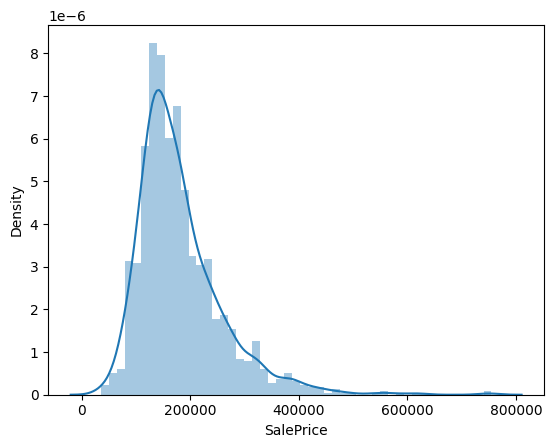

In [21]:
# plot showing distribution of target variable in train dataset.
sns.distplot(houseData['SalePrice'])
plt.show()

#### The above plot shows that the target variable 'SalePrice' in train dataset is normally distributed.

In [22]:
houseData['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [23]:

#Finding correlations of all features or predictor variables against the SalePrice or target varianle.
def correlation_houseData(df):
    corr_houseData=df.corr()['SalePrice']
    return corr_houseData
# #sorting correlations of predictor and target variables in descending order.
# correlation_houseData(houseData).sort_values(ascending=False)

In [24]:
#Checking how the numerical data of the dataset is distributed (before doing any outlier treatment)
houseData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


#### The predictor variable 'overall Quality, has the highest correlation towards the sale price of a house
#### Comparing overall Quality of the house with the other top 6 parametes to see how they are scattered

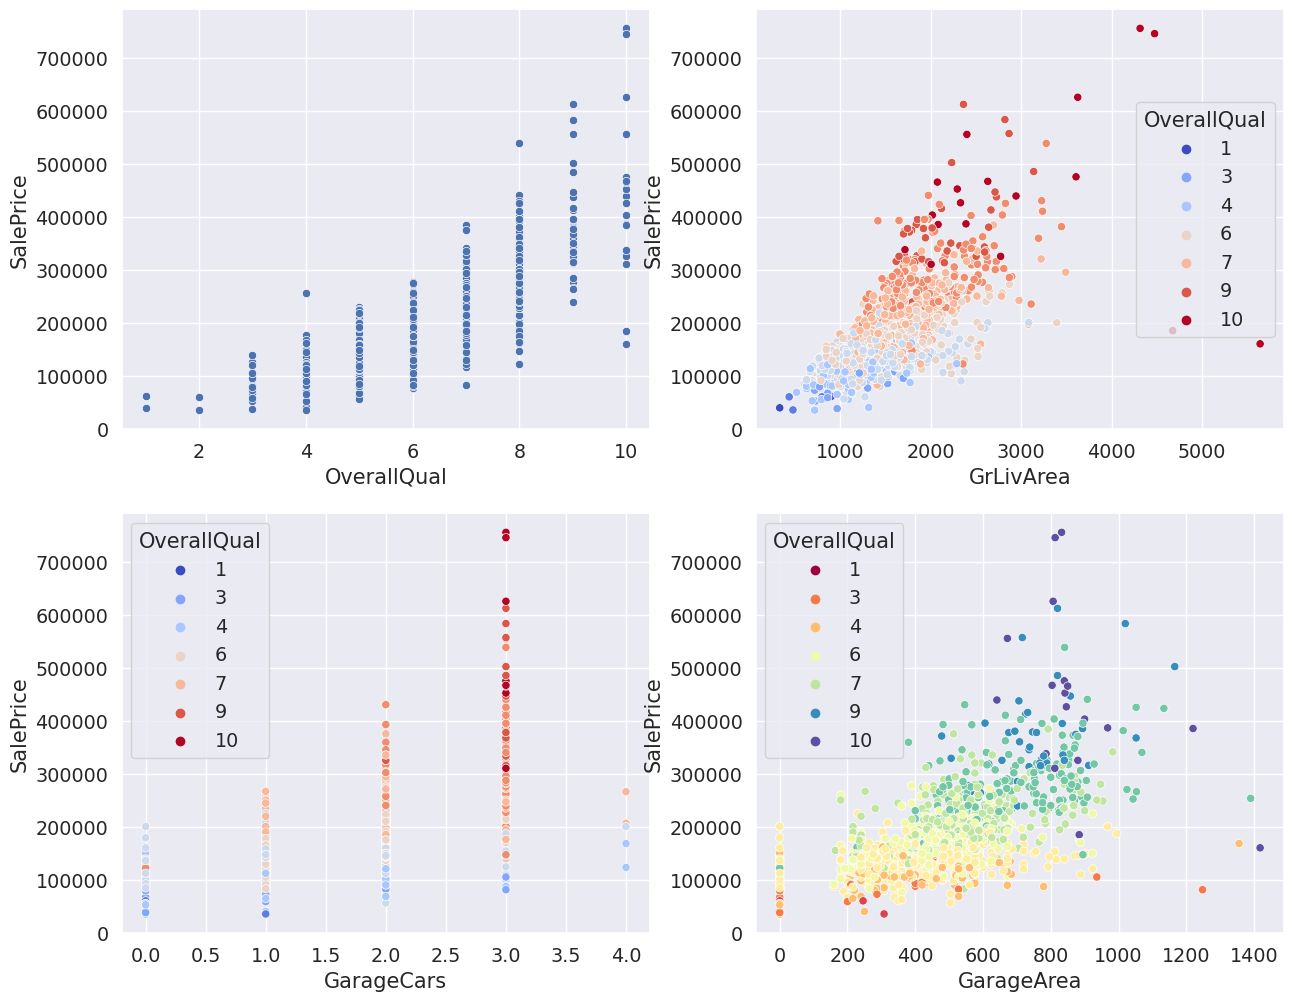

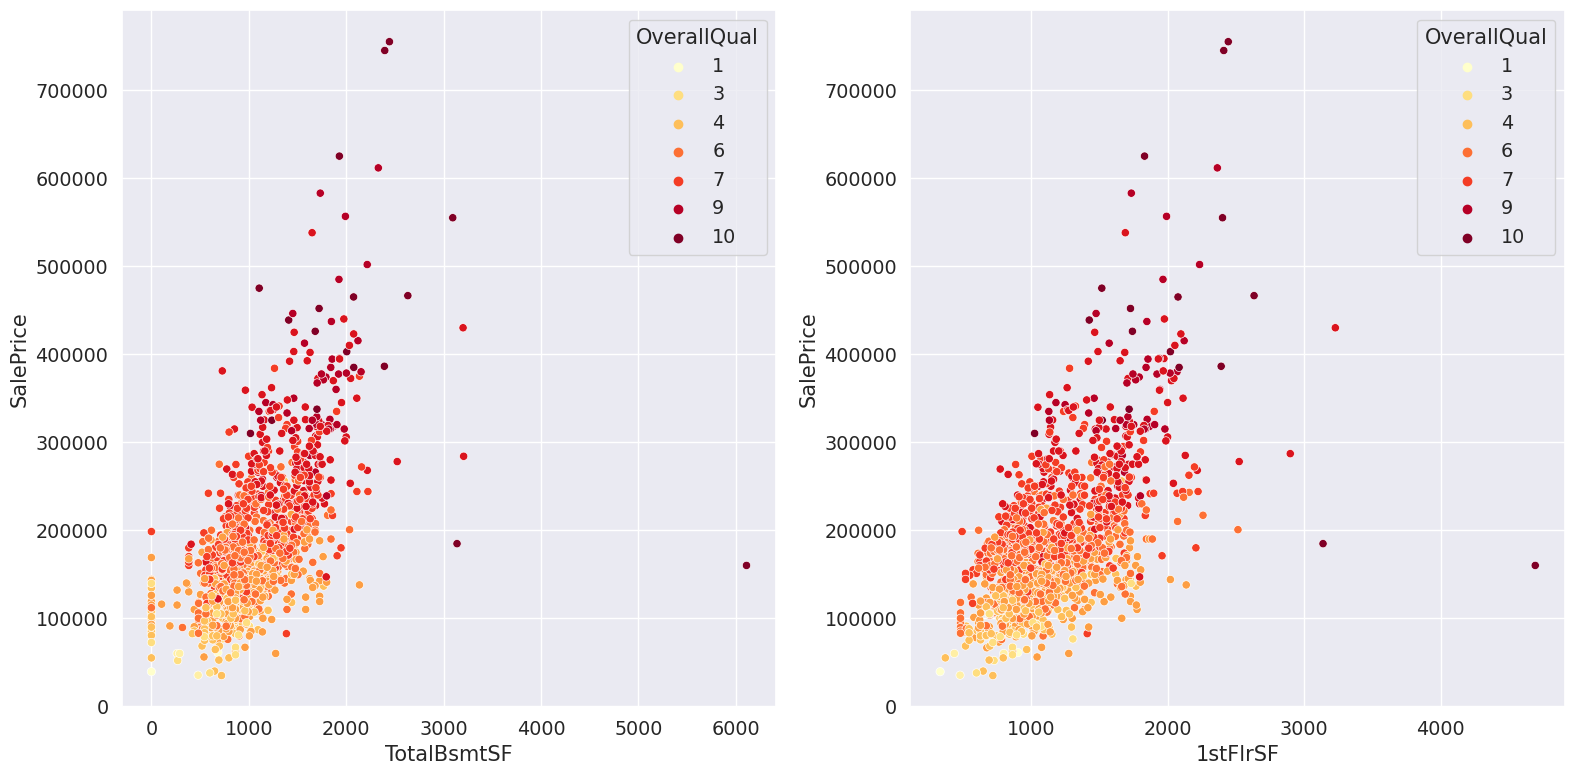

In [25]:
fig = plt.figure(figsize=(15, 12))
sns.set(font_scale=1.25)

#Box plot overallqual/salePrice
fig1 = fig.add_subplot(221); 
sns.scatterplot(x='OverallQual', y='SalePrice', data=houseData[['SalePrice', 'OverallQual']])

# GrLivArea vs SalePrice plot
fig2 = fig.add_subplot(222); 
sns.scatterplot(x = houseData.GrLivArea, y = houseData.SalePrice, hue=houseData.OverallQual, palette= 'coolwarm')

# GarageCars vs SalePrice plot
fig3 = fig.add_subplot(223); 
sns.scatterplot(x = houseData.GarageCars, y = houseData.SalePrice, hue=houseData.OverallQual, palette= 'coolwarm')

#GarageArea vs SalePrice plot
fig4 = fig.add_subplot(224); 
sns.scatterplot(x = houseData.GarageArea, y = houseData.SalePrice, hue=houseData.OverallQual, palette= 'Spectral')

fig5 = plt.figure(figsize=(16, 8))
fig6 = fig5.add_subplot(121); 
sns.scatterplot(y = houseData.SalePrice , x = houseData.TotalBsmtSF, hue=houseData.OverallQual, palette= 'YlOrRd')

fig7 = fig5.add_subplot(122); 
sns.scatterplot(y = houseData.SalePrice, x = houseData['1stFlrSF'], hue=houseData.OverallQual, palette= 'YlOrRd')

plt.tight_layout(); 
plt.show()

#### We could see that SalePrice of some houses with high living area are under 200000, which contradictory as high living area generally directly correlates to high house prices.
#### Hence removing those rows.

In [26]:
houseData = houseData.drop(houseData[(houseData.GrLivArea>5000) & (houseData.SalePrice<200000)].index)
houseData.shape

(1459, 74)

In [27]:
houseTest.shape

(1459, 73)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

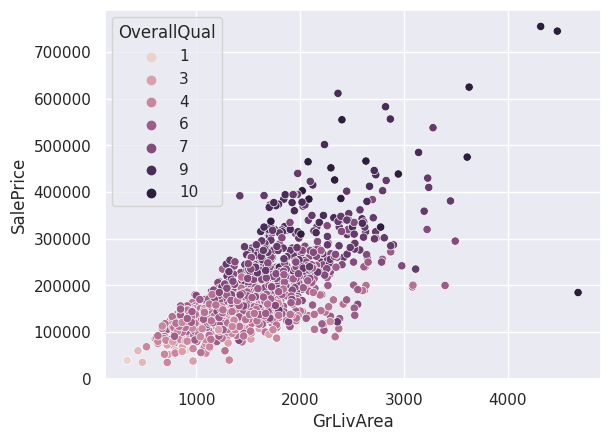

In [28]:
#Plotting the age of the house against the house sale price
fig1 = fig.add_subplot(111);
sns.set(font_scale=1)
sns.scatterplot(x = houseData.GrLivArea, y = houseData.SalePrice, hue=houseData.OverallQual)

In [29]:
#to find the Age of the house.
today = date.today()
currYear = today.year
houseData['age'] = (currYear - houseData['YearBuilt'])
houseTest['age'] = (currYear - houseTest['YearBuilt'])


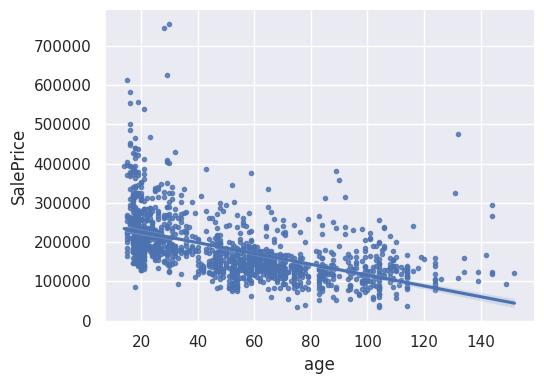

In [30]:
#plot of Age versus SalePrice
sns.lmplot(y = 'SalePrice', x = 'age', data=houseData, markers='.',aspect=1.4, height=4)
plt.show();  

### From above plot, we can clearly see that newer the house, higher the price is. 

In [31]:
houseData.shape

(1459, 75)

In [32]:
#Function to find categorical variables

def find_categorical_columns(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    print("categorical columns : ",len(categorical_cols))
    return categorical_cols

# for train dataset    
categorical_cols_train =find_categorical_columns(houseData)  

categorical columns :  37


In [33]:
houseData[categorical_cols_train].nunique()
for column in categorical_cols_train:
    houseData[column] = houseData[column].astype('category')

In [34]:
#for test dataset
categorical_cols_test = find_categorical_columns(houseTest)
    
for column in categorical_cols_test:
    houseTest[column] = houseTest[column].astype('category')

categorical columns :  37


In [35]:
#checking datatypes of variables in test dataset
houseTest.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotArea             int64
Street           category
                   ...   
MoSold              int64
YrSold              int64
SaleType         category
SaleCondition    category
age                 int64
Length: 74, dtype: object

In [36]:
#checking datatypes of variables in train dataset
houseData.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotArea             int64
Street           category
                   ...   
YrSold              int64
SaleType         category
SaleCondition    category
SalePrice           int64
age                 int64
Length: 75, dtype: object

In [37]:
houseData.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch

In [38]:
#Encoding all categorical variables in train dataset to numerical using label encoder technique. 
for column in categorical_cols_train:
    houseData[column]=houseData[column].cat.codes
houseData.head()
    

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,age
0,1,60,3,8450,1,3,3,4,0,5,...,0,0,0,0,2,2008,8,4,208500,21
1,2,20,3,9600,1,3,3,2,0,24,...,0,0,0,0,5,2007,8,4,181500,48
2,3,60,3,11250,1,0,3,4,0,5,...,0,0,0,0,9,2008,8,4,223500,23
3,4,70,3,9550,1,0,3,0,0,6,...,0,0,0,0,2,2006,8,0,140000,109
4,5,60,3,14260,1,0,3,2,0,15,...,0,0,0,0,12,2008,8,4,250000,24


In [39]:
#Encoding all categorical variables in test dataset to numerical using label encoder technique. 
for column in categorical_cols_test:
    houseTest[column]=houseTest[column].cat.codes
houseTest.head()
 


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age
0,1461,20,2,11622,1,3,3,4,0,12,...,0,0,120,0,0,6,2010,8,4,63
1,1462,20,3,14267,1,0,3,0,0,12,...,0,0,0,0,12500,6,2010,8,4,66
2,1463,60,3,13830,1,0,3,4,0,8,...,0,0,0,0,0,3,2010,8,4,27
3,1464,60,3,9978,1,0,3,4,0,8,...,0,0,0,0,0,6,2010,8,4,26
4,1465,120,3,5005,1,0,1,4,0,22,...,0,0,144,0,0,1,2010,8,4,32


In [40]:
# correlation_house_Data(houseData).sort_values(ascending=False)
houseData.shape,houseTest.shape

((1459, 75), (1459, 74))

### 3. Data Preparation for model building 

In [41]:
# split into X and y
X = houseData.drop(['SalePrice'], axis=1)
y= houseData['SalePrice']
X.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age
0,1,60,3,8450,1,3,3,4,0,5,...,0,0,0,0,0,2,2008,8,4,21
1,2,20,3,9600,1,3,3,2,0,24,...,0,0,0,0,0,5,2007,8,4,48
2,3,60,3,11250,1,0,3,4,0,5,...,0,0,0,0,0,9,2008,8,4,23
3,4,70,3,9550,1,0,3,0,0,6,...,272,0,0,0,0,2,2006,8,0,109
4,5,60,3,14260,1,0,3,2,0,15,...,0,0,0,0,0,12,2008,8,4,24


In [42]:
X.shape

(1459, 74)

In [43]:
y.shape

(1459,)

In [44]:
#Importing all required libraries for model bulding
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

### 4. Model Building and Prediction

In [45]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [46]:
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    rmse= np.sqrt(-cross_val_score(model, X.values, y.values, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

#### Lasso and ElasticNet score obtained without stacking different Algorithms. 

In [47]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 29514.2040 (6687.9031)



In [48]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 29512.8506 (6686.3521)



#### rmse score should always be minimum as it's the square of error score. Hence low value of rmse score means our prediction is closer to actual value.

Next, we can further reduce the rmse score by ensemble method i.e by stacking 3 differnt models using 3 differnt algorithms and creating a metamodel.

This metamodel inturn can be used for prediction.

In [49]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [50]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR,model_xgb,model_lgb),
                                                 meta_model = lasso)
score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319

In [51]:
X.values

array([[1.000e+00, 6.000e+01, 3.000e+00, ..., 8.000e+00, 4.000e+00,
        2.100e+01],
       [2.000e+00, 2.000e+01, 3.000e+00, ..., 8.000e+00, 4.000e+00,
        4.800e+01],
       [3.000e+00, 6.000e+01, 3.000e+00, ..., 8.000e+00, 4.000e+00,
        2.300e+01],
       ...,
       [1.458e+03, 7.000e+01, 3.000e+00, ..., 8.000e+00, 4.000e+00,
        8.300e+01],
       [1.459e+03, 2.000e+01, 3.000e+00, ..., 8.000e+00, 4.000e+00,
        7.400e+01],
       [1.460e+03, 2.000e+01, 3.000e+00, ..., 8.000e+00, 4.000e+00,
        5.900e+01]])

In [52]:
stacked_averaged_models.fit(X.values,y.values)
stacked_pred = stacked_averaged_models.predict(houseTest.values)

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319

In [53]:
from joblib import dump

# Specify the file path where you want to save the model
model_filename = 'stacked_averaged_models.pkl'

# Save the model to disk
dump(stacked_averaged_models, model_filename)

print("Model saved successfully as", model_filename)


Model saved successfully as stacked_averaged_models.pkl


In [54]:
# solution = pd.DataFrame(stacked_pred,columns = ["SalePrice"])
# solution.to_csv("submission.csv", index_label = houseTest["Id"])

### We can see that by using stacking technique we have now brought down the error score to a lower value than earlier, which inturn means our prediction is closer to the Actual SalePrice of the house. 

In [55]:
len(stacked_pred)

1459

In [56]:
print('hj')

hj


In [57]:
houseTest['SalePrice'] = stacked_pred

In [58]:
houseTest

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age,SalePrice
0,1461,20,2,11622,1,3,3,4,0,12,...,0,120,0,0,6,2010,8,4,63,122068.082531
1,1462,20,3,14267,1,0,3,0,0,12,...,0,0,0,12500,6,2010,8,4,66,159819.782220
2,1463,60,3,13830,1,0,3,4,0,8,...,0,0,0,0,3,2010,8,4,27,184818.712672
3,1464,60,3,9978,1,0,3,4,0,8,...,0,0,0,0,6,2010,8,4,26,195221.240813
4,1465,120,3,5005,1,0,1,4,0,22,...,0,144,0,0,1,2010,8,4,32,183306.528179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,1936,1,3,3,4,0,10,...,0,0,0,0,6,2006,8,4,54,79751.045859
1455,2916,160,4,1894,1,3,3,4,0,10,...,0,0,0,0,4,2006,8,0,54,77377.430172
1456,2917,20,3,20000,1,3,3,4,0,11,...,0,0,0,0,9,2006,8,0,64,160185.535557
1457,2918,85,3,10441,1,3,3,4,0,11,...,0,0,0,700,7,2006,8,4,32,118777.719748


In [59]:
Submission=houseTest[['Id', 'SalePrice']]
Submission.to_csv('submission.csv', index=None)